### The purpose of this notebook is to explore the ground truth crop data and handle the missing crop types ('DESC')

**Importing packages and the geojson file**

In [101]:
import geopandas as gpd
import pandas as pd
import folium as fm
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [102]:
%matplotlib inline

Download the 2023 file here: https://agriculture.canada.ca/atlas/data_donnees/annualCropInventoryGroundTruthData/data_donnees/geoJSON/

In [103]:
df = gpd.read_file('annual_crop_inventory_ground_truth_data_v1_2023.geojson') #june, july, and august
df

,FID,AXF_OBJE_1,OBJECTID,DATE_TIME,LAT_Y,LONG_X,AGR_LU_C_1,CROP_TYP_1,SHAPE_X,SHAPE_Y,AXF_TIME_1,OID_,SUBTYPE__1,CODE,DESCRIPT_1,PROVINCE,geometry
0,0,64,0,2023-07-31 08:46:40,1.241458e+06,2.440934e+06,100000,100100,2.440934e+06,1.241458e+06,1690761600000,1,100000,100100,Barley,PE,POINT (-63.21176 46.30380)
1,1,65,0,2023-07-31 08:46:45,1.241625e+06,2.440779e+06,110000,110120,2.440779e+06,1.241625e+06,1690761600000,24,110000,110120,Clover,PE,POINT (-63.21265 46.30575)
2,2,66,0,2023-07-31 08:47:35,1.242160e+06,2.440297e+06,100000,100100,2.440299e+06,1.242155e+06,1690761600000,1,100000,100100,Barley,PE,POINT (-63.21538 46.31189)
3,3,67,0,2023-07-31 08:47:47,1.241915e+06,2.440264e+06,100000,100110,2.440264e+06,1.241915e+06,1690761600000,4,100000,100110,Corn,PE,POINT (-63.21712 46.31007)
4,4,68,0,2023-07-31 08:48:59,1.242817e+06,2.439830e+06,100000,100150,2.439833e+06,1.242809e+06,1690761600000,8,100000,100150,Oats,PE,POINT (-63.21728 46.31898)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57174,57174,1454,0,2023-08-17 19:01:26,2.873279e+06,-2.065186e+06,120000,120106,-2.065186e+06,2.873279e+06,1692316800000,0,0,0,,YT,POINT (-135.16731 60.88290)
57175,57175,1455,0,2023-08-17 19:01:38,2.873293e+06,-2.065301e+06,120000,120106,-2.065301e+06,2.873293e+06,1692316800000,0,0,0,,YT,POINT (-135.16925 60.88249)
57176,57176,1456,0,2023-08-17 19:02:11,2.873285e+06,-2.065076e+06,120000,120106,-2.065076e+06,2.873285e+06,1692316800000,0,0,0,,YT,POINT (-135.16565 60.88345)
57177,57177,1457,0,2023-08-17 19:04:02,2.873625e+06,-2.074408e+06,120000,120106,-2.074408e+06,2.873625e+06,1692316800000,0,0,0,,YT,POINT (-135.31498 60.84353)


**Simple EDA**

In [104]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57179 entries, 0 to 57178
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         57179 non-null  int64   
 1   AXF_OBJE_1  57179 non-null  int64   
 2   OBJECTID    57179 non-null  int64   
 3   DATE_TIME   57179 non-null  object  
 4   LAT_Y       57179 non-null  float64 
 5   LONG_X      57179 non-null  float64 
 6   AGR_LU_C_1  57179 non-null  int64   
 7   CROP_TYP_1  57179 non-null  int64   
 8   SHAPE_X     57179 non-null  float64 
 9   SHAPE_Y     57179 non-null  float64 
 10  AXF_TIME_1  57179 non-null  int64   
 11  OID_        57179 non-null  int64   
 12  SUBTYPE__1  57179 non-null  int64   
 13  CODE        57179 non-null  int64   
 14  DESCRIPT_1  57179 non-null  object  
 15  PROVINCE    57179 non-null  object  
 16  geometry    57179 non-null  geometry
dtypes: float64(4), geometry(1), int64(9), object(3)
memory usage: 7.4+ MB


In [105]:
df.describe(include='all')

,FID,AXF_OBJE_1,OBJECTID,DATE_TIME,LAT_Y,LONG_X,AGR_LU_C_1,CROP_TYP_1,SHAPE_X,SHAPE_Y,AXF_TIME_1,OID_,SUBTYPE__1,CODE,DESCRIPT_1,PROVINCE,geometry
count,57179.000000,57179.000000,57179.0,57179,5.717900e+04,5.717900e+04,5.717900e+04,57179.000000,5.717900e+04,5.717900e+04,5.717900e+04,57179.000000,57179.000000,57179.000000,57179,57179,57179
unique,NaN,NaN,NaN,56072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,7,57179
top,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ON,POINT (-63.21175641621782 46.30380299135926)
freq,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54718,27447,1
mean,28589.000000,3201.126095,0.0,NaN,9.691954e+05,1.164956e+06,1.430188e+05,143118.632645,1.164960e+06,9.691916e+05,1.688766e+12,3.004005,5865.789888,5872.173071,NaN,NaN,NaN
std,16506.299858,2905.621404,0.0,NaN,4.593424e+05,1.424207e+06,5.167996e+04,51339.316232,1.424209e+06,4.593418e+05,6.722751e+10,19.396790,28768.068603,28797.376976,NaN,NaN,NaN
min,0.000000,0.000000,0.0,NaN,0.000000e+00,-2.216216e+06,0.000000e+00,0.000000,-2.216216e+06,0.000000e+00,-2.209162e+12,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,14294.500000,1092.000000,0.0,NaN,5.913411e+05,1.144510e+06,1.000000e+05,100192.000000,1.144510e+06,5.913411e+05,1.689206e+12,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,28589.000000,2315.000000,0.0,NaN,1.059900e+06,1.339391e+06,1.100000e+05,110150.000000,1.339373e+06,1.059896e+06,1.689898e+12,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,42883.500000,4280.000000,0.0,NaN,1.215417e+06,2.380216e+06,1.800000e+05,180160.000000,2.380216e+06,1.215417e+06,1.690330e+12,0.000000,0.000000,0.000000,NaN,NaN,NaN


**It would be easier to work with dates here in datetime format. To convert them, we need to remove 17 empty values**

In [106]:
df = df.loc[~(df['DATE_TIME'] == ' ')]
df.info() #should be 57162

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 57162 entries, 0 to 57178
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         57162 non-null  int64   
 1   AXF_OBJE_1  57162 non-null  int64   
 2   OBJECTID    57162 non-null  int64   
 3   DATE_TIME   57162 non-null  object  
 4   LAT_Y       57162 non-null  float64 
 5   LONG_X      57162 non-null  float64 
 6   AGR_LU_C_1  57162 non-null  int64   
 7   CROP_TYP_1  57162 non-null  int64   
 8   SHAPE_X     57162 non-null  float64 
 9   SHAPE_Y     57162 non-null  float64 
 10  AXF_TIME_1  57162 non-null  int64   
 11  OID_        57162 non-null  int64   
 12  SUBTYPE__1  57162 non-null  int64   
 13  CODE        57162 non-null  int64   
 14  DESCRIPT_1  57162 non-null  object  
 15  PROVINCE    57162 non-null  object  
 16  geometry    57162 non-null  geometry
dtypes: float64(4), geometry(1), int64(9), object(3)
memory usage: 7.9+ MB


**Converting to datetime**

In [107]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

/Users/arsenchuzhykov/anaconda3/envs/sentinel_hub_env/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


**These windshield surveys were taken in June, July, August 2023. Let's see exact days with value counts**

In [108]:
daily_distribution = df['DATE_TIME'].dt.to_period('D').value_counts().sort_index()
daily_distribution

DATE_TIME
2023-06-21     302
2023-06-27      32
2023-07-04     782
2023-07-05    1515
2023-07-06    1271
2023-07-07    1400
2023-07-08    1084
2023-07-09       1
2023-07-10    1025
2023-07-11    2177
2023-07-12    4259
2023-07-13    2249
2023-07-14     971
2023-07-16      16
2023-07-17    2361
2023-07-18    4713
2023-07-19    2537
2023-07-20    1885
2023-07-21    1911
2023-07-23     148
2023-07-24    3716
2023-07-25    4011
2023-07-26    4706
2023-07-27    3298
2023-07-28    3347
2023-07-31     803
2023-08-01     926
2023-08-02     732
2023-08-08     124
2023-08-09     309
2023-08-10     844
2023-08-11     372
2023-08-12      87
2023-08-14     160
2023-08-15    2302
2023-08-16     483
2023-08-17     303
Freq: D, Name: count, dtype: int64

**Value counts for crop type codes**

In [109]:
types = df['CROP_TYP_1'].value_counts().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(types)

CROP_TYP_1
110150    11041
100110     8221
150160     6993
210000     3523
100192     2731
110100     1883
210100     1666
180220     1559
120150     1117
110140     1002
120131      950
100100      940
280000      934
100150      862
180291      558
100191      551
120102      519
250011      462
100190      459
190010      446
160140      364
240110      362
150120      359
240120      338
190000      325
260011      324
240000      310
120104      290
120142      285
120133      278
290123      268
290110      240
100162      236
160130      232
100000      227
110000      215
230000      208
160170      205
100130      193
110120      188
290120      173
140000      173
160190      168
260000      167
170100      165
180230      162
190020      162
180260      156
180130      147
200000      146
290000      142
180270      139
120105      132
240140      129
110170      127
270000      123
190030      120
240100      116
120108      110
260010      106
230010      104
100101       

In [110]:
types = df['AGR_LU_C_1'].value_counts().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(types)

AGR_LU_C_1
100000    14675
110000    14587
150000     7447
210000     5189
120000     3991
180000     3202
240000     1254
290000     1140
160000     1122
190000     1053
280000      950
250000      621
260000      597
140000      380
230000      312
170000      280
200000      202
270000      124
130000       26
300000        9
240140        1
Name: count, dtype: int64


# Clean data and produce a new geojson

We need at least 3 checks for consistency of this data

1. Check dates to know the order **(done)**
2. Assuming we found all of the codes and corresponding descriptions. Are there any pairs with different mapping? (basically can one code be used for 2 or more descriptions and vice versa) **(done)**
3. Plot distributions of crop types **(done)** But double check in the end
4. Check with the map **(done)** But double check in the end

**Creating a new df to focus on understanding the codes**

In [111]:
nd = df[['AGR_LU_C_1', 'CROP_TYP_1', 'SUBTYPE__1', 'CODE', 'DESCRIPT_1']] #new dataframe (nd)

<span style="color:orange">Not a single clue what AGR_LU_C_1 means. 21 doesn't help too</span>

In [112]:
nd['AGR_LU_C_1'].unique().size

21

<span style="color:orange">Assuming CROP_TYP_1 means the same as CODE. It's logical that we have more of CROP_TYP_1s than CODEs, the bigger territory has more crop diversity. Only P.E.I. has CODEs and DESCRIPT_1s, give or take</span>

In [113]:
nd['CROP_TYP_1'].unique().size

146

<span style="color:orange">11. 11 is cool!</span>

In [114]:
nd['SUBTYPE__1'].unique().size

11

<span style="color:orange">Clear relationship between CODE and DESCRIPT_1</span>

In [115]:
nd['CODE'].unique().size

30

In [116]:
nd['DESCRIPT_1'].unique().size

30

<span style="color:orange">The spread is insane. We have only 2 columns which are connected properly so far</span>

**Next we need to check if CODE always equals to CROP_TYP_1**

In [117]:
short_nd = nd.loc[~(nd['CODE'] == 0)]

In [118]:
# Check if each agri_code has only one crop_type
code_to_crop_check = short_nd.groupby('CODE')['DESCRIPT_1'].nunique().max() == 1

# Check if each crop_type has only one agri_code
crop_to_code_check = short_nd.groupby('DESCRIPT_1')['CODE'].nunique().max() == 1

if code_to_crop_check and crop_to_code_check:
    print("Each code represents only one crop type and vice versa.")
else:
    print("The mapping is not 1:1 between codes and crop types.")


Each code represents only one crop type and vice versa.


In [119]:
# Check if each agri_code has only one crop_type
code_to_crop_check = short_nd.groupby('CODE')['CROP_TYP_1'].nunique().max() == 1

# Check if each crop_type has only one agri_code
crop_to_code_check = short_nd.groupby('CROP_TYP_1')['CODE'].nunique().max() == 1

if code_to_crop_check and crop_to_code_check:
    print("Each code represents only one crop type and vice versa.")
else:
    print("The mapping is not 1:1 between codes and crop types.")

Each code represents only one crop type and vice versa.


<span style="color:orange">Might be a gamble, but let's just assume that these codes are universal and there are no obvious mistakes. Then we can conclude that the reason why there are more CROP_TYP_1s than CODEs is that Canada is much bigger than P.E.I. and has more crop diversity</span>

In [120]:
short_nd.to_excel('short_nd.xlsx')

<span style="color:orange">Excel for the win! Just looked at short_nd there - SUBTYPE__1 and AGR_LU_C_1 are exactly the same and they represent first two digits of CROP_TYP_1 and CODE. Now the logic behind these codes is more or less clear</span>

<img src="pic1.png" width="400" height="400">

**There is enough diversity for each SUBTYPE__1 value. For example, 100000 is Barley, Oats, Rye, Rye - Winter, Wheat - Spring, and Wheat - Winter**

<span style="color:orange">Warning! Log scale on the histogram below</span>

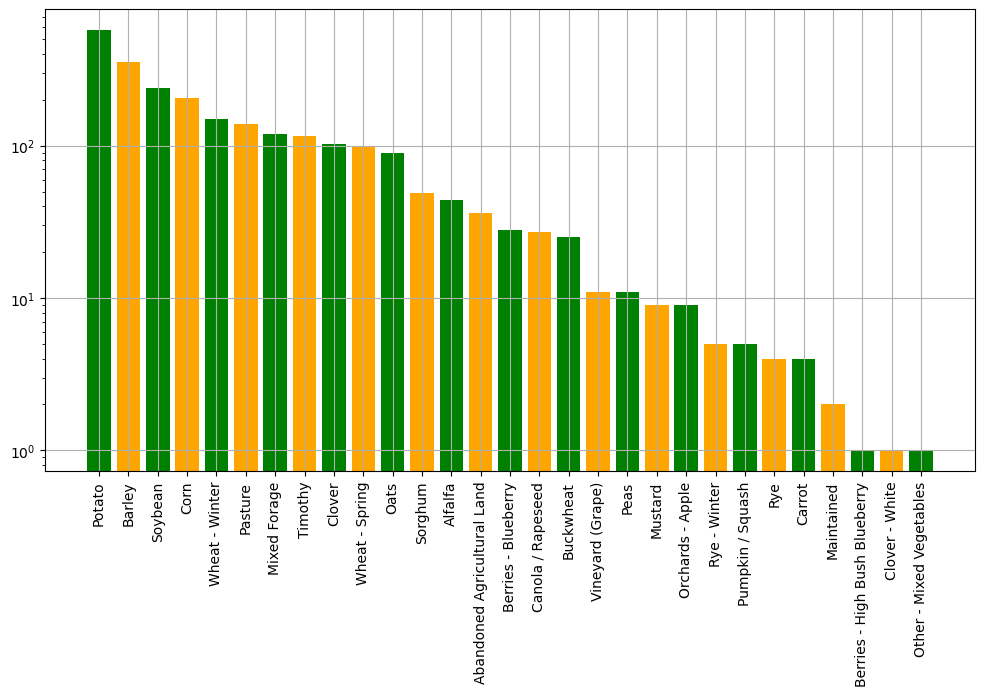

In [121]:
category_counts = short_nd['DESCRIPT_1'].value_counts()
plt.figure(figsize=(12, 6))
ax = plt.gca()

for i, (category, count) in enumerate(category_counts.items()):
    color = 'green' if i % 2 == 0 else 'orange'  # Change to the color of your choice
    ax.bar(category, count, color=color)

ax.set_yscale('log')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Test run of plotting map with folium, will switch to something else later**

In [122]:
pei_map = fm.Map(location = [46.3,-63], zoom_start = 8)
test_subset = df.loc[~(nd['CODE'] == 0)].sample(n=500)

In [123]:
for row in test_subset.iterrows():
    row_values = row[1]
    location=[row_values['geometry'].y, row_values['geometry'].x]
    popup = '<strong>' + row_values['DESCRIPT_1'] + '</strong>'
    marker = fm.Marker(location = location, popup = popup)
    marker.add_to(pei_map)

Just ran folium on all of the points with initial description. They all are on P.E.I! Below you will see only 500 of them, because if it's all of them, folium is laggy. That's why we will switch to something else for plotting

<span style="color:orange">Tap on markers - you will see crop types</span>

In [124]:
display(pei_map)

### Next step is populating missing values

**Making a mapping**

In [125]:
code_to_type_map = short_nd.groupby('CROP_TYP_1')['DESCRIPT_1'].unique().reset_index().sort_values('CROP_TYP_1')
code_to_type_map['DESCRIPT_1'] = code_to_type_map['DESCRIPT_1'].apply(lambda x: x[0]) #for some reason desc values are np arrays (probably happened in the previous line), converting them back to str
mapping_dict = code_to_type_map.set_index('CROP_TYP_1')['DESCRIPT_1'].to_dict()
mapping_dict

{100100: 'Barley',
 100110: 'Corn',
 100150: 'Oats',
 100160: 'Rye',
 100162: 'Rye - Winter',
 100191: 'Wheat - Spring',
 100192: 'Wheat - Winter',
 110100: 'Alfalfa',
 110120: 'Clover',
 110123: 'Clover - White',
 110150: 'Mixed Forage',
 110170: 'Timothy',
 120102: 'Berries - Blueberry',
 120103: 'Berries - High Bush Blueberry',
 120131: 'Orchards - Apple',
 120150: 'Vineyard (Grape)',
 150120: 'Canola / Rapeseed',
 150140: 'Mustard',
 150160: 'Soybean',
 160110: 'Buckwheat',
 160180: 'Sorghum',
 170130: 'Peas',
 180130: 'Carrot',
 180220: 'Potato',
 180230: 'Pumpkin / Squash',
 180291: 'Other - Mixed Vegetables',
 190000: 'Abandoned Agricultural Land',
 210000: 'Pasture',
 250011: 'Maintained'}

**Replacing " " (empty spaces) with NaNs in original df**

In [126]:
df['DESCRIPT_1'].replace(' ', np.nan, inplace=True)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 57162 entries, 0 to 57178
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FID         57162 non-null  int64         
 1   AXF_OBJE_1  57162 non-null  int64         
 2   OBJECTID    57162 non-null  int64         
 3   DATE_TIME   57162 non-null  datetime64[ns]
 4   LAT_Y       57162 non-null  float64       
 5   LONG_X      57162 non-null  float64       
 6   AGR_LU_C_1  57162 non-null  int64         
 7   CROP_TYP_1  57162 non-null  int64         
 8   SHAPE_X     57162 non-null  float64       
 9   SHAPE_Y     57162 non-null  float64       
 10  AXF_TIME_1  57162 non-null  int64         
 11  OID_        57162 non-null  int64         
 12  SUBTYPE__1  57162 non-null  int64         
 13  CODE        57162 non-null  int64         
 14  DESCRIPT_1  2461 non-null   object        
 15  PROVINCE    57162 non-null  object        
 16  geometry    57162 n

/var/folders/dn/l0v3spf94pq616k_0n39k87w0000gn/T/ipykernel_15210/1922421040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DESCRIPT_1'].replace(' ', np.nan, inplace=True)


**Creating a Series of mapped values**

In [127]:
mapped_values = df['CROP_TYP_1'].map(mapping_dict)

**Replacing NaNs with mapping**

In [128]:
df['DESCRIPT_1'] = df['DESCRIPT_1'].fillna(mapped_values)

/Users/arsenchuzhykov/anaconda3/envs/sentinel_hub_env/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [129]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 57162 entries, 0 to 57178
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FID         57162 non-null  int64         
 1   AXF_OBJE_1  57162 non-null  int64         
 2   OBJECTID    57162 non-null  int64         
 3   DATE_TIME   57162 non-null  datetime64[ns]
 4   LAT_Y       57162 non-null  float64       
 5   LONG_X      57162 non-null  float64       
 6   AGR_LU_C_1  57162 non-null  int64         
 7   CROP_TYP_1  57162 non-null  int64         
 8   SHAPE_X     57162 non-null  float64       
 9   SHAPE_Y     57162 non-null  float64       
 10  AXF_TIME_1  57162 non-null  int64         
 11  OID_        57162 non-null  int64         
 12  SUBTYPE__1  57162 non-null  int64         
 13  CODE        57162 non-null  int64         
 14  DESCRIPT_1  43843 non-null  object        
 15  PROVINCE    57162 non-null  object        
 16  geometry    57162 n

In [130]:
df.to_excel('df_with_types.xlsx')

In [131]:
df.dropna(inplace=True)

/var/folders/dn/l0v3spf94pq616k_0n39k87w0000gn/T/ipykernel_15210/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [132]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 43843 entries, 0 to 57165
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FID         43843 non-null  int64         
 1   AXF_OBJE_1  43843 non-null  int64         
 2   OBJECTID    43843 non-null  int64         
 3   DATE_TIME   43843 non-null  datetime64[ns]
 4   LAT_Y       43843 non-null  float64       
 5   LONG_X      43843 non-null  float64       
 6   AGR_LU_C_1  43843 non-null  int64         
 7   CROP_TYP_1  43843 non-null  int64         
 8   SHAPE_X     43843 non-null  float64       
 9   SHAPE_Y     43843 non-null  float64       
 10  AXF_TIME_1  43843 non-null  int64         
 11  OID_        43843 non-null  int64         
 12  SUBTYPE__1  43843 non-null  int64         
 13  CODE        43843 non-null  int64         
 14  DESCRIPT_1  43843 non-null  object        
 15  PROVINCE    43843 non-null  object        
 16  geometry    43843 n

In [133]:
df = df.reset_index(drop=True)

In [134]:
to_geojson = df.copy()
to_geojson

,FID,AXF_OBJE_1,OBJECTID,DATE_TIME,LAT_Y,LONG_X,AGR_LU_C_1,CROP_TYP_1,SHAPE_X,SHAPE_Y,AXF_TIME_1,OID_,SUBTYPE__1,CODE,DESCRIPT_1,PROVINCE,geometry
0,0,64,0,2023-07-31 08:46:40,1.241458e+06,2.440934e+06,100000,100100,2.440934e+06,1.241458e+06,1690761600000,1,100000,100100,Barley,PE,POINT (-63.21176 46.30380)
1,1,65,0,2023-07-31 08:46:45,1.241625e+06,2.440779e+06,110000,110120,2.440779e+06,1.241625e+06,1690761600000,24,110000,110120,Clover,PE,POINT (-63.21265 46.30575)
2,2,66,0,2023-07-31 08:47:35,1.242160e+06,2.440297e+06,100000,100100,2.440299e+06,1.242155e+06,1690761600000,1,100000,100100,Barley,PE,POINT (-63.21538 46.31189)
3,3,67,0,2023-07-31 08:47:47,1.241915e+06,2.440264e+06,100000,100110,2.440264e+06,1.241915e+06,1690761600000,4,100000,100110,Corn,PE,POINT (-63.21712 46.31007)
4,4,68,0,2023-07-31 08:48:59,1.242817e+06,2.439830e+06,100000,100150,2.439833e+06,1.242809e+06,1690761600000,8,100000,100150,Oats,PE,POINT (-63.21728 46.31898)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43838,57097,1381,0,2023-08-17 14:26:46,3.072026e+06,-2.047744e+06,110000,110150,-2.047744e+06,3.072026e+06,1692230400000,0,0,0,Mixed Forage,YT,POINT (-136.76176 62.53186)
43839,57098,1374,0,2023-08-17 14:10:34,3.071813e+06,-2.048238e+06,110000,110150,-2.048238e+06,3.071813e+06,1692230400000,0,0,0,Mixed Forage,YT,POINT (-136.76766 62.52783)
43840,57104,1380,0,2023-08-17 14:19:13,3.079892e+06,-2.048040e+06,190000,190000,-2.048040e+06,3.079892e+06,1692230400000,0,0,0,Abandoned Agricultural Land,YT,POINT (-136.84385 62.59237)
43841,57107,1384,0,2023-08-17 14:34:12,3.058030e+06,-2.047341e+06,190000,190000,-2.047341e+06,3.058030e+06,1692230400000,0,0,0,Abandoned Agricultural Land,YT,POINT (-136.61837 62.42358)


In [135]:
to_geojson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43843 entries, 0 to 43842
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FID         43843 non-null  int64         
 1   AXF_OBJE_1  43843 non-null  int64         
 2   OBJECTID    43843 non-null  int64         
 3   DATE_TIME   43843 non-null  datetime64[ns]
 4   LAT_Y       43843 non-null  float64       
 5   LONG_X      43843 non-null  float64       
 6   AGR_LU_C_1  43843 non-null  int64         
 7   CROP_TYP_1  43843 non-null  int64         
 8   SHAPE_X     43843 non-null  float64       
 9   SHAPE_Y     43843 non-null  float64       
 10  AXF_TIME_1  43843 non-null  int64         
 11  OID_        43843 non-null  int64         
 12  SUBTYPE__1  43843 non-null  int64         
 13  CODE        43843 non-null  int64         
 14  DESCRIPT_1  43843 non-null  object        
 15  PROVINCE    43843 non-null  object        
 16  geometry    43

In [136]:
to_geojson['DATE_TIME'] = to_geojson['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M:%S')

**Now we can convert it to GeoJSON**

In [137]:
geojson_string = to_geojson.to_json(indent = 4)
with open('crop_type_for_each_point.geojson', 'w') as f:
    f.write(geojson_string)

<span style="color:orange">**BOOKMARK**</span>

### Next steps:
1. Check geojson (done)
2. Check everything and plot df (the one before to_geojson) (done)
3. Plot every point from df on the map (not folium)
4. Create a polygon of P E I for BBOX splitter and work with this polygon
5. Plot on this map our 9 pixels near truth poins
6. Make sure that that 15% error either doesn't exist ot we account for that with coordinate systems for example (check the presentations from the first course)

<span style="color:orange">Geojson looks alright. The only concern is id as a string in the new file. I think it should be alright, but if it's not suitable for Andrew's algorithm, I'll change it</span>

Further explanation is in the Chat "Check 1:1 code crop...".

In the GeoJSON format, the "id" field is optional and can be either a string or a number. However, if you need consistency across your GeoJSON objects—for instance, if a tool that consumes the GeoJSON expects IDs to be in a specific format—you can ensure the IDs are integers during the conversion process.

If you already have a GeoJSON string with the IDs as strings and want to change them to integers, you would have to load the GeoJSON into Python as a dictionary, iterate over the features, convert the IDs, and then dump the dictionary back to a GeoJSON string

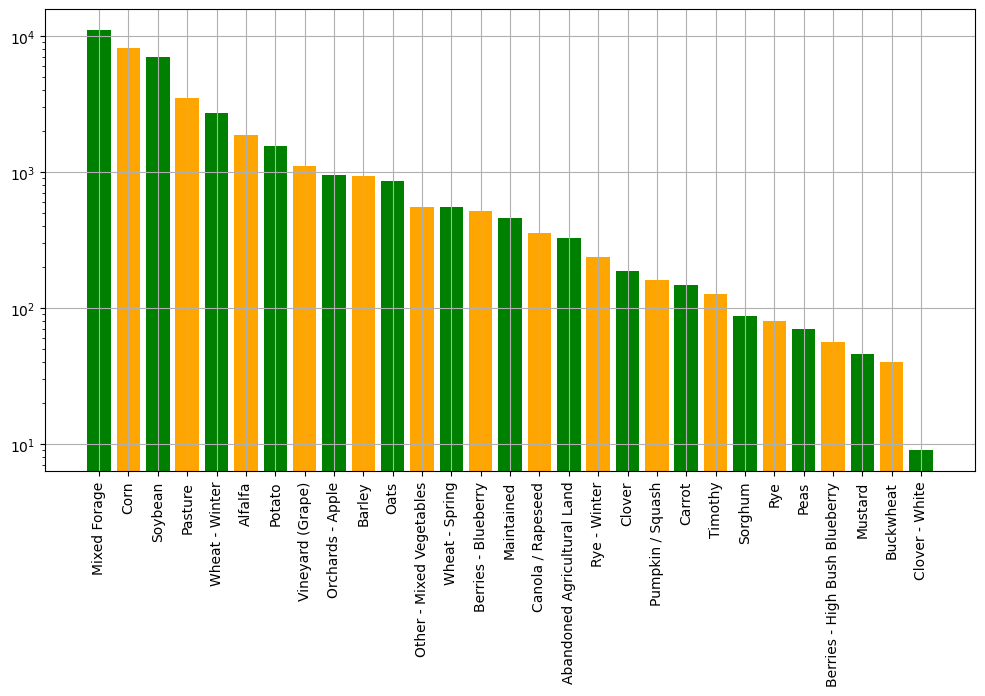

In [138]:
category_counts_upd = df['DESCRIPT_1'].value_counts()
plt.figure(figsize=(12, 6))
ax = plt.gca()

for i, (category, count) in enumerate(category_counts_upd.items()):
    color = 'green' if i % 2 == 0 else 'orange'  # Change to the color of your choice
    ax.bar(category, count, color=color)

ax.set_yscale('log')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**The distribution is very different from P.E.I., but it makes sense**

In [139]:
canada_map = fm.Map(location = [60,-80], zoom_start = 3)
df_sample = df.sample(n=500)

In [140]:
for row in df_sample.iterrows():
    row_values = row[1]
    location=[row_values['geometry'].y, row_values['geometry'].x]
    popup = '<strong>' + row_values['DESCRIPT_1'] + '</strong>'
    marker = fm.Marker(location = location, popup = popup)
    marker.add_to(canada_map)

In [141]:
display(canada_map)

Roughly 6 zones. The best for us are PEI and Ontario. Just in case we need more observations for training the model